<a href="https://colab.research.google.com/github/jmc33/Python-3-Formation-complete/blob/master/Correction_Python_Visa_Mercredi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<a href="https://exed.polytechnique.edu/fr" ><img src="https://exed.polytechnique.edu/sites/all/themes/college/images/logo.png" style="float:left; max-width: 360px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="float:right; max-width: 250px; display: inline"  alt="Wikistat"/></a>

</center>

# [Scénarios d'Apprentissage Statistique](https://github.com/wikistat/Apprentissage)

# GRC: Score d'appétence d'un produit bancaire  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-learn"/></a>

#### Résumé
Les données sont composées de 825 clients d'une banque décrits par 32 variables concernant leurs avoirs, et utilisations de leurs comptes. Après avoir réalisé, avec [R](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou [Python](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb), le premier objectif de segmentation ou profilage des types de comportement des clients, le 2ème consiste à estimer puis prévoir un *score d'appétence* pour un produit bancaie, ici la carte visa premier. Comparaison des différentes méthodes et algorihtmes d'apprentissage pour atteindre cet objectif de la régression logistique au *boosting* (*extrem gradient*) en passant par les arbres, les SVM ou random forest. Une procédure de validation croisée généralisée est itérée sur une selection de ces méthodes. Celles d'agrégation de modèles conduisent aux meilleurs résultats. 

## Introduction
### Objectif
Un  [calepin]((https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-Python-Visa.ipynb), qu'il est préférable d'exécuter préalablement, décrit le premier objectif d'exploration puis segmentation ou profilage des types de comportement des clients d'une banque. 

Ce deuxième calepin propose de construire un [score d'appétence](http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-scenar-app-visa.pdf) pour la carte *Visa Premier*. Il s'agit d'un score d'appétence mais ce pourrait être le score d'attrition (*churn*) d'un opérateur téléphonique ou encore un score de défaillance d'un emprunteur ou de faillite d'une entreprise; les outils de modélisation sont les mêmes et sont très largement utilisés dans tout le secteur tertiaire pour l'aide à la décision.

### Présentation des données
#### Les variables
La liste des variables est issue d'une base de données retraçant l'historique mensuel bancaire et les caractéristiques de tous les clients. Un sondage a été réalisé afin d'alléger les traitements ainsi qu'une première sélection de variables. Les variables contenues dans le fichier initial sont décrites dans le tableau ci-dessous. Elles sont observées sur 1425 clients.

*Tableau: Liste des variables initiales et de leur libellé* Attention, certains sont écrits en majuscules dans les programmes puis en minuscules après transfomation des données (logarithme, recodage) au cours d ela phase d'exploration. Les noms des variables logarithmes des variables quantitatives se terminent par `L`les variables qualitatives se terminent par `Q`ou `q`. 

**Identifiant** | **Libellé**
           --|--
`sexeq` | Sexe (qualitatif) 
`ager` | Age en années
`famiq` | Situation familiale: `Fmar Fcel Fdiv Fuli Fsep Fveu`
`relat` | Ancienneté de relation en mois
`pcspq` | Catégorie socio-professionnelle (code num)
`opgnb` | Nombre d'opérations par guichet dans le mois
`moyrv` | Moyenne des mouvements nets créditeurs des 3 mois en Kf
`tavep` | Total des avoirs épargne monétaire en francs
`endet` | Taux d'endettement
`gaget` | Total des engagements en francs
`gagec` | Total des engagements court terme en francs
`gagem` | Total des engagements moyen terme en francs
`kvunb` | Nombre de comptes à vue
`qsmoy` | Moyenne des soldes moyens sur 3 mois
`qcred` | Moyenne des mouvements créditeurs en Kf
`dmvtp` | Age du dernier mouvement (en jours)\hline
`boppn` | Nombre d'opérations à M-1
`facan` | Montant facturé dans l'année en francs
`lgagt` | Engagement long terme
`vienb` | Nombre de produits contrats vie
`viemt` | Montant des produits contrats vie en francs
`uemnb` | Nombre de produits épargne monétaire
`xlgnb` | Nombre de produits d'épargne logement
`xlgmt` | Montant des produits d'épargne logement en francs
`ylvnb` | Nombre de comptes sur livret
`ylvmt` | Montant des comptes sur livret en francs
`rocnb` | Nombre de paiements par carte bancaire à M-1
`nptag` | Nombre de cartes point argent
`itavc` | Total des avoirs sur tous les comptes
`havef` | Total des avoirs épargne financière en francs
`jnbjd | Nombre de jours à débit à M
**`carvp`** | **Possession de la carte VISA Premier**


**Répondre aux questions en s'aidant des résultats des exécutions**

## Préparation des données
### Lecture 
Les données sont disponibles dans le répertoire de ce calepin et chargées en même temps. Elles sont issues de la première phase de [prétraitement](https://github.com/wikistat/Exploration/blob/master/GRC-carte_Visa/Explo-R-Visa.ipynb) ou *data munging* pour détecter, corriger les erreurs et incohérences, éliminer des redondances, traiter les données manquantes, transformer certaines variables. 

In [4]:
# Importation des librairies.
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
 


In [5]:
# Lecture d'un data frame en ligne
vispremv = pd.read_table('https://raw.githubusercontent.com/adieulev/DSO/master/vispremv.dat', delimiter=' ')
#Donner la taille des données

In [6]:
# Lecture d'un data frame si vous travaillez en local 
# Placer la table dans le bon dossier et décommenter la ligne suivante
# vispremv = pd.read_table('vispremv.dat', delimiter=' ')

In [7]:
vispremv.head()

,SEXEQ,FAMIQ,PCSPQ,kvunbq,vienbq,uemnbq,xlgnbq,ylvnbq,rocnbq,nptagq,endetq,gagetq,facanq,lgagtq,havefq,jnbjdq,ageq,relatq,qsmoyq,opgnbq,moyrvq,tavepq,dmvtpq,boppnq,itavcq,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,QSMOY,QCREDL,DMVTPL,BOPPNL,FACANL,LGAGTL,VIENB,VIEMTL,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL,CARVP
148009,Shom,Fcou,Pint,K1,V1,U2,X2,Y2,R1,N0,E1,G1,F1,L0,H1,J1,A2,R2,Q2,O0,M2,T2,D0,B2,I2,238,51,0.000000,4.753590,13.461603,1.609438,11.688701,0.00000,11.688701,2,35938,4.744932,2.484907,3.912023,12.235714,0.0,1,11.935123,4,2,13.161865,2,12.110635,14,0,14.080718,13.230263,0.693147,Coui
552427,Shom,Fcou,Pint,K0,V0,U1,X0,Y1,R0,N0,E0,G0,F1,L0,H0,J0,A2,R1,Q0,O0,M2,T1,D1,B0,I2,139,58,0.000000,3.713572,8.132413,0.000000,0.000000,0.00000,0.000000,1,1336,3.713572,2.708050,1.098612,8.130059,0.0,0,0.000000,1,0,0.000000,1,8.132413,0,0,11.717872,0.000000,0.000000,Coui
556005,Shom,Fseu,Psan,K0,V0,U2,X1,Y2,R1,N0,E0,G0,F0,L0,H0,J0,A0,R1,Q2,O0,M1,T2,D0,B1,I2,99,27,0.000000,2.890372,11.242717,0.000000,0.000000,0.00000,0.000000,1,12221,2.890372,2.484907,3.178054,0.000000,0.0,0,0.000000,3,1,10.743178,2,10.309286,14,0,11.329303,0.000000,0.000000,Coui
556686,Shom,Fseu,Pouv,K0,V1,U2,X2,Y2,R1,N1,E0,G1,F0,L0,H1,J1,A1,R1,Q2,O0,M2,T2,D0,B2,I2,89,49,0.000000,5.926926,13.067592,0.000000,12.250391,10.54165,12.050611,1,21187,5.342334,2.484907,3.912023,0.000000,0.0,1,9.972267,5,3,12.899220,2,11.203025,11,1,13.111856,9.972267,2.772589,Coui
642680,Shom,Fcou,Pint,K0,V0,U2,X1,Y2,R1,N0,E0,G0,F0,L0,H0,J1,A2,R2,Q1,O2,M2,T2,D0,B2,I2,216,64,1.791759,3.218876,11.270382,0.000000,0.000000,0.00000,0.000000,1,7154,3.218876,2.484907,4.219508,0.000000,0.0,0,0.000000,4,1,10.457976,2,9.190546,27,0,11.304904,0.000000,1.386294,Coui


In [8]:
# Isoler les Variables quantitatives
vispremv.describe()

,RELAT,AGER,OPGNBL,MOYRVL,TAVEPL,ENDETL,GAGETL,GAGECL,GAGEML,KVUNB,QSMOY,QCREDL,DMVTPL,BOPPNL,FACANL,LGAGTL,VIENB,VIEMTL,UEMNB,XLGNB,XLGMTL,YLVNB,YLVMTL,ROCNB,NPTAG,ITAVCL,HAVEFL,JNBJDL
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,132.574788,42.573848,0.627211,2.371296,6.715418,0.827903,4.477338,1.868891,2.394713,1.028222,10629.129821,2.238062,2.508658,2.751399,2.827715,1.635187,0.239887,1.796629,1.468485,0.649106,4.161701,0.760113,4.726685,8.564440,0.136406,9.373976,3.043170,1.189791
std,93.499830,11.912343,0.685315,1.464376,4.907295,1.279475,5.473534,3.680483,4.540024,0.501554,23825.306640,1.416175,0.969467,1.422198,4.756887,4.208156,0.789424,4.094587,1.280262,0.794352,5.205502,0.782235,4.662683,11.738092,0.379837,3.313518,4.665580,1.587594
min,-2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-70050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,33.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,440.000000,1.386294,2.639057,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.067305,0.000000,0.000000
50%,130.000000,43.000000,0.693147,2.564949,8.652248,0.000000,0.000000,0.000000,0.000000,1.000000,4421.000000,2.484907,2.639057,3.258097,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.882802,2.000000,0.000000,10.075969,0.000000,0.000000
75%,204.500000,52.000000,1.098612,3.349750,10.962298,1.945910,10.483833,0.000000,0.000000,1.000000,11111.000000,3.218876,2.708050,3.784190,8.160804,0.000000,0.000000,0.000000,2.000000,1.000000,10.033572,1.000000,9.651494,14.000000,0.000000,11.649131,6.216606,2.441401
max,393.000000,65.000000,3.367296,7.451242,13.785052,4.605170,15.060512,13.123924,14.296852,4.000000,241827.000000,6.855409,6.851185,5.572154,14.101840,15.060512,13.000000,15.511046,9.000000,4.000000,13.270100,4.000000,13.785052,69.000000,4.000000,16.045468,15.770893,4.905275


Vérifier ci-dessous que la plupart des variables ont deux versions, l'une quantitative et l'autre qualitative.

Les variables qualitatives (sexe, csp, famille) sont transformées en indicatrices à l'exception de la cible `CARVP`.

In [9]:
# Identifier les variables qualitatives (object) ou quantitatives
vispremv.dtypes
# On observe que trois variables ne sont pas des recodages des variables quantitatives: SEXEQ, FAMIQ, PCSPQ

SEXEQ      object
FAMIQ      object
PCSPQ      object
kvunbq     object
vienbq     object
uemnbq     object
xlgnbq     object
ylvnbq     object
rocnbq     object
nptagq     object
endetq     object
gagetq     object
facanq     object
lgagtq     object
havefq     object
jnbjdq     object
ageq       object
relatq     object
qsmoyq     object
opgnbq     object
moyrvq     object
tavepq     object
dmvtpq     object
boppnq     object
itavcq     object
RELAT       int64
AGER        int64
OPGNBL    float64
MOYRVL    float64
TAVEPL    float64
ENDETL    float64
GAGETL    float64
GAGECL    float64
GAGEML    float64
KVUNB       int64
QSMOY       int64
QCREDL    float64
DMVTPL    float64
BOPPNL    float64
FACANL    float64
LGAGTL    float64
VIENB       int64
VIEMTL    float64
UEMNB       int64
XLGNB       int64
XLGMTL    float64
YLVNB       int64
YLVMTL    float64
ROCNB       int64
NPTAG       int64
ITAVCL    float64
HAVEFL    float64
JNBJDL    float64
CARVP      object
dtype: object

In [10]:
# Transformation en indicatrices des variables qualitatives
# Utiliser pd.get_dummies
vispremDum = pd.get_dummies(vispremv[["SEXEQ", "FAMIQ", "PCSPQ"]],drop_first=True)

 

# Concaténation ensuite avec les variables numériques
vispremNum = vispremv.select_dtypes(exclude=['object'])
vispremR = pd.concat([vispremDum,vispremNum],axis=1)
 
 

**Q** Combien d'individus et combien de variables sont finalement concernés? 

In [11]:
#TODO calculer nombre individus et variables
print(vispremR.shape)


(1063, 34)


In [13]:
# La variable à expliquer est recodée
y=vispremv["CARVP"].map(lambda x: 0 if x=="Cnon" else 1)

### Extraction des échantillons apprentissage et test

In [14]:
rd_seed = 20052021  # Modifier cette valeur d'initialisation
npop = len(vispremv)
#On placera 200 points dans l'ensmeble de test
xApp, xTest, yApp, yTest = train_test_split(vispremR,
                                            y,
                                            test_size=200,random_state = rd_seed)
#Taille de l'échantillon train obtenu
print(xApp.shape)

(863, 34)


## [Régression logistique](http://wikistat.fr/pdf/st-m-app-rlogit.pdf)
Cette ancienne méthode reste toujours très utilisée. D'abord par habitude mais aussi par efficacité pour le traitement de données très volumineuses lors de l'estimation de très gros modèles (beaucoup de variables) notamment par exemple chez Criteo ou CDiscount.

### Estimation et optimisation
La procédure de sélection de modèle est celle par pénalisation: *ridge*, Lasso ou une combinaison (*elastic net*). Contrairement aux procédures disponibles en R (*stepwise, backward, forward*) optimisant un critère comme *AIC*, l'algorithme proposé dans `scikit-learn` nepermet pas une prise en compte simple des interactions. D'autre part les compléments usuels (test de Wald ou du rapport de vraisemblance) ne sont pas directement fournis. 



#### Remarque importante: 

POur la cross validation, doit on couper le **dataset complet** en train + validation sets ou bien seulement **l'ensemble d'apprentissage**?

A première vue, on pourrait donner le dataset entier, car on va déjà dans la cross validation couper en deux, mais en fait il faut couper en trois:
- un test set qu'on réserve 
- un ensemble d'apprentissage sur lequel on fait de la validation croisée (donc qu'on va couper de nombreuses fois en un train set + un validation set)

Sinon, comme on va choisir le paramètre qui a le meilleur résultat sur l'ensemble de validation (ou qui a le meilleur résultat après cross validation), il est possible qu'on choisisse un paramètre pour lequel le score était particuliérement bon "par chance".

On évaluera toujours en dernier lieu la performance sur un dataset (le test) complètement indépendant du processus de sélection des paramètres (le train) ou hyperparamètres (le validation).

C'est ce qui apparaissait dans le pipeline au premier cours !

<center>
<img src="http://www.cmap.polytechnique.fr/~aymeric.dieuleveut/papers/This-is-ML-pipe" style="float:left; max-width: 600px; display: inline" alt="INSA"/></center>
<br>


Voir par exemple: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

On s'intéresse tout d'abord à une pénalisation $L^1$ des coefficients. Ensuite on essaye d'optimiser le paramètre par validation croisée, d'abord à la main, ensuite en utilisant un gridsearch.


In [15]:
# Commençons par fitter une regression logistique avec 1 parametre C=1 - Pénalité L1 - Solver Liblinear
from sklearn.linear_model import LogisticRegression

#Définition du modèle
C = 1
clf = LogisticRegression(solver='liblinear', C=C, penalty='l1')

#Apprentissage
clf.fit(xApp, yApp)

#Test
clf.score(xTest, yTest)

0.835

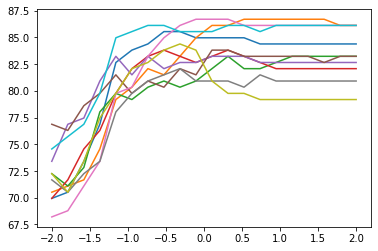

In [16]:
# Tracons l'erreur en focntion de la valeur de C regression logistique 
for rd_seed in range(10):
    xTrain, xVal, yTrain, yVal = train_test_split(xApp,
                                                  yApp,
                                                  test_size=0.2,
                                                  random_state=rd_seed)

    Cs = np.logspace(-2,2,20)
    score_selon_C = np.zeros((1, len(Cs)))
    for i, C in enumerate(Cs):
        clf = LogisticRegression(solver='liblinear',
                                 C=C,
                                 penalty='l1',
                                 random_state=rd_seed)

        clf.fit(xTrain, yTrain)
        score_selon_C[0, i] = 100 * clf.score(xVal, yVal)
        #print('POur C= %.1f, on obtient une accuracy de %.1f %%' %
        #   (C, 100 * clf.score(xTest, yTest)))

    plt.plot(np.log10(Cs), score_selon_C[0, :])

{'C': 8.858667904100823}


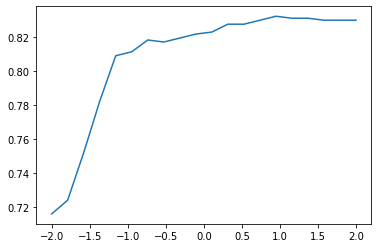

In [17]:
#Automatisation par GridSearch CV

param = [{
    "C": np.logspace(-2,2,20)
}]  # dictionnaire de valeurs de C, utilisé pour GridSearchCV

logitLasso = GridSearchCV(LogisticRegression(solver='liblinear',
                                 penalty='l1',
                                 random_state=rd_seed),
                          param, cv=20)
logitLasso.fit(xApp, yApp)
print(logitLasso.best_params_)
plt.plot(np.log10(param[0]['C']), logitLasso.cv_results_['mean_test_score'])

In [18]:
print('Le meilleur paramètre est C= %.1e, le meilleur score est %.1f %%' %(logitLasso.best_params_['C'], 100*logitLasso.best_score_))

Le meilleur paramètre est C= 8.9e+00, le meilleur score est 83.2 %


In [19]:
# Calculer perte sur l'échantillon d'apprentissage 
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))


Meilleur score (apprentissage) = 0.167891, Meilleur paramètre = {'C': 8.858667904100823}


In [20]:
Copt=logitLasso.best_params_['C']

logitLassoOpt=LogisticRegression(solver='liblinear',penalty="l1",C=Copt) # replace by the best parameters !!
logitLassoOpt=logitLassoOpt.fit(xApp, yApp)

# Prévision
yChap = logitLassoOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Lasso = %f" % (1-logitLasso.score(xTest, yTest)))

CARVP    0   1
row_0         
0      116  17
1       15  52
Erreur de test régression Lasso = 0.160000


In [21]:
# Récupération des coefficients
vect_coef=np.matrix.transpose(logitLassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)


PCSPQ_Psan    4.292701
PCSPQ_Pouv    3.695626
PCSPQ_Pint    2.929039
PCSPQ_Pemp    2.712720
SEXEQ_Shom    1.324059
BOPPNL        1.113108
XLGNB         1.060675
KVUNB         1.039134
UEMNB         0.879992
NPTAG         0.857039
QCREDL        0.837642
OPGNBL        0.680539
YLVNB         0.447916
ENDETL        0.333770
MOYRVL        0.299558
DMVTPL        0.287585
VIENB         0.148218
HAVEFL        0.117969
ITAVCL        0.099525
GAGECL        0.096297
YLVMTL        0.095515
FAMIQ_Fseu    0.085961
XLGMTL        0.069813
VIEMTL        0.057357
ROCNB         0.055633
JNBJDL        0.045442
FACANL        0.035566
GAGEML        0.033772
TAVEPL        0.033054
GAGETL        0.027503
LGAGTL        0.008186
RELAT         0.008011
AGER          0.006181
QSMOY         0.000003
dtype: float64


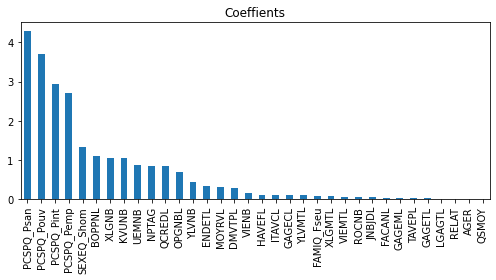

In [22]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()
#On affiche les coefficients "importants" pour la régression logistique pénalisée Lasso.

#### Optimisation *ridge*
On considère maintenant l'optimisation Ridge, ou la pénalité est proportionnelle à la norme 2 de l'estimateur (au carré). On peut totalement changer la pénalité $L^1$ en pénalité $L^2$ et reprendre exactement la même procédure.


{'C': 14.38449888287663}
Le meilleur paramètre est C= 1.4e+01, le meilleur score est 83.2 %


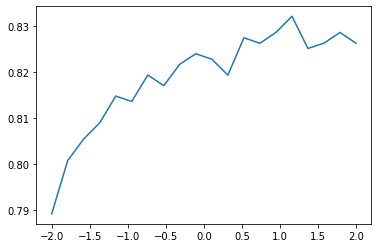

In [ ]:
#Automatisation par GridSearch CV et L2

param = [{
    "C": np.logspace(-2,2,20)
}]  # dictionnaire de valeurs de C, utilisé pour GridSearchCV

logitRidge = GridSearchCV(LogisticRegression(solver='liblinear',
                                 penalty='l2',
                                 random_state=rd_seed),
                          param, cv=20)
logitRidge.fit(xApp, yApp)
print(logitRidge.best_params_)
plt.plot(np.log10(param[0]['C']),logitRidge.cv_results_['mean_test_score'])

print('Le meilleur paramètre est C= %.1e, le meilleur score est %.1f %%' %(logitRidge.best_params_['C'], 100*logitRidge.best_score_))

In [ ]:
# Calculer perte sur l'échantillon d'apprentissage 
print("Meilleur score (apprentissage) = %f, Meilleur paramètre = %s" %
      (1.-logitRidge.best_score_,logitRidge.best_params_))
Copt=logitRidge.best_params_['C']

LogitRidgeOpt=LogisticRegression(solver='liblinear',penalty="l2",C=Copt) # replace by the best parameters !!
LogitRidgeOpt=LogitRidgeOpt.fit(xApp, yApp)


# Prévision
yChap = LogitRidgeOpt.predict(xTest)
# matrice de confusion
table=pd.crosstab(yChap,yTest)
print(table)
# Erreur sur l'échantillon test
print("Erreur de test régression Ridge = %f" % (1-LogitRidgeOpt.score(xTest, yTest)))

Meilleur score (apprentissage) = 0.167891, Meilleur paramètre = {'C': 14.38449888287663}
CARVP    0   1
row_0         
0      116  18
1       15  51
Erreur de test régression Ridge = 0.165000


In [ ]:
# Récupération des coefficients
vect_coef=np.matrix.transpose(LogitRidgeOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)


PCSPQ_Psan    2.871593
PCSPQ_Pouv    2.326090
PCSPQ_Pint    1.650267
PCSPQ_Pemp    1.441049
SEXEQ_Shom    1.271140
XLGNB         1.105607
BOPPNL        1.092472
KVUNB         1.021237
UEMNB         0.944907
NPTAG         0.940010
QCREDL        0.720986
YLVNB         0.643305
OPGNBL        0.621539
MOYRVL        0.365225
ENDETL        0.306875
DMVTPL        0.260002
FAMIQ_Fseu    0.135144
VIENB         0.129144
HAVEFL        0.112924
ITAVCL        0.095837
GAGECL        0.091111
XLGMTL        0.070313
YLVMTL        0.068435
JNBJDL        0.065486
ROCNB         0.055387
VIEMTL        0.054218
TAVEPL        0.040608
FACANL        0.036611
GAGETL        0.032994
GAGEML        0.029304
AGER          0.008361
RELAT         0.007893
LGAGTL        0.007744
QSMOY         0.000004
dtype: float64
Erreur de test régression Ridge = 0.165000


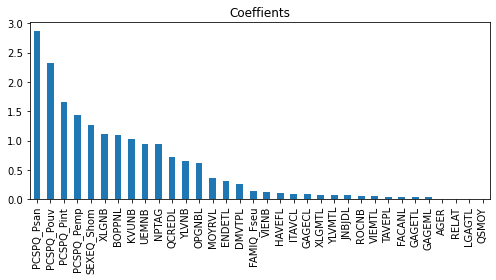

In [ ]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
plt.show()
#On affiche les coefficients "importants" pour la régression logistique pénalisée ridge

**Q** Noter l'erreur de prévision; Comparer avec celle estimée par validation croisée.

### Interprétation

L'objet logitRidge issu de GridSearchCV ne retient pas les paramètres estimés dans le modèle. Il faut donc ré-estimer avec la valeur optimale du paramètre de pénalisation si l'on souhaite afficher ces coefficients.

In [ ]:
RidgeOpt=LogisticRegression(penalty="l2",C=12) # replace by the best parameters !!
RidgeOpt=RidgeOpt.fit(xApp, yApp)
# Récupération des coefficients
vect_coef=np.matrix.transpose(LassoOpt.coef_)
vect_coef=vect_coef.ravel()
#Affichage des 25 plus importants
coef=pd.Series(abs(vect_coef),index=xApp.columns).sort_values(ascending=False)
print(coef)

In [ ]:
plt.figure(figsize=(7,4))
coef.plot(kind='bar')
plt.title('Coeffients')
plt.tight_layout()
send(plt, 5)
plt.show()